![](https://searchvectorlogo.com/wp-content/uploads/2020/10/qonto-logo-vector.png)

## Loan control with Qonto 

## Time : 15 min


[Qonto](https://qonto.com) is an online bank for SMEs and entrepreneurs. Their goal is: *building the best business banking service by using technology and design, with a fair and transparent pricing! We think that SMEs have been neglected for too long and that traditional institutions have failed to propose a banking experience adapted to the needs of entrepreneurs.*


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(
    "pexgKGBEPzA",
    width=700,
    height=500
    )


Recently Qonto partnered with [October](https://fr.october.eu/) to provide loan to their customers. The idea is: 

* No paperwork 
* Immediate answer 

Their service is actually based on Machine Learning since it's an algorithm (name [KEA](https://fr.october.eu/notre-nouveau-modele-de-scoring-analyse-risque-kea/)) that will tell whether the loan is authorized or not. 

Now, what Qonto would like to know is whether the algorithm follows the same performance as the ones showed during tests. 

The main way to test loan performance is to assess the percentage of defaults (how many people couldn't pay back their loan). To make sure the company stays profitable, they need to have an average default rate below 8.5%.

We've gathered data on different loans, your goal is to test whether the algorithm respects the maximum default loan rate. 

## Step 1 - Import libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Step 2 - Import Dataset 

Now you need to import your dataset. Download `swile_calls.csv` and load it in your notebook using `pandas`

In [2]:
df = pd.read_csv("qonto_loans.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330


## Step 3 - EDA 

For our EDA, we will simply calculate the `mean` using python. Also, you can plug data in Tableau to see understand your dataset better. You can also read descriptions of the columns in the `qonto_loans_columns_description.xlsx` file 

In [4]:
df.mean()

SK_ID_CURR                    278434.555600
TARGET                             0.077500
CNT_CHILDREN                       0.419200
AMT_INCOME_TOTAL              167780.011693
AMT_CREDIT                    603476.101800
AMT_ANNUITY                    26909.101710
AMT_GOODS_PRICE               541461.026708
REGION_POPULATION_RELATIVE         0.021051
dtype: float64

## Step 4 - Define hypothesises

Now what we need to do is to define our $H_0$ and $H_1$: 

* $H_0$ - Target >= 0.085
* $H_1$ - Target <  0.085

## Step 5 - Calculate Z-score 

Let's calculate our $Z-score$ so that we will be able to run our test. To do so, you will need to:

* Calculate the average `TARGET` 
* Calculate the std of `TARGET` 
* Find sample size `n`
* Apply $Z = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$

In [5]:
# Calculate Z-score 
sample_average = df.mean()["TARGET"]
sample_std = df.std()["TARGET"]
mu = 0.085
n = len(df)

z_score = (sample_average - mu)/(sample_std/np.sqrt(n))
print("Z-score equal: {}".format(z_score))

Z-score equal: -2.804823315581202


## Step 6 - Set $\alpha$ 

Now we need to set a confidence level $\alpha$, after talking with Qonto's financial team, they told us that `5%` is okay.

In [6]:
# Define alpha 
alpha = 0.05

## Step 7 - Compare p-value to $\alpha$ 

Finally, we need to get our `p-value`. Instead of looking at tools like [Statdistributions.com](https://statdistributions.com), you can use this function from `statsmodels` library: 

* [`ztest`](https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)

In [7]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df["TARGET"], alternative='smaller', value=mu)

print("p-value is: {}".format(p_value))
print("Z_score value is: {}".format(z_score))

if p_value < alpha:
    print("We can reject the Null Hypothesis")
else:
    print("We can't reject the Null hypothesis")

Z_score value is: -2.8048233155813316
p-value is: 0.0025172084065654857
We can reject the Null Hypothesis


## Step 8 (Optional) - Visualize probability

Finally, one cool thing could be to visualize your Z-test! One thing that we could use is `matplotlib.pyplot` library with `seaborn`. Check out this code and try to understand the results. 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


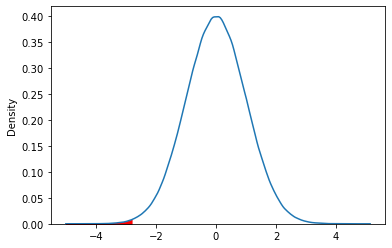

In [8]:
### Visualize area under curve
import seaborn as sns

# Displot from seaborn gives us a distribution from what is inside the parenthesis
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
ax = sns.distplot(np.random.normal(0, 1, size=1000000), hist=None) 

# This is a mask that will let us filter only the values beyond z-score
mask = ax.lines[0].get_xydata()[:, 0] < z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = ax.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = ax.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
ax.fill_between(x_area_under_curve, y_area_under_curve, color="red")
plt.show()